# Model 001 basicVm

Charlie Shobe

This model has stream power and linear diffusion of the forms:
$$\frac{d\eta}{dt}=-KA^mS^n$$
and
$$\frac{d\eta}{dt} = -D\nabla^2\eta$$

So, at steady state, the landscape will obey:
$$S=\left(\frac{U}{KA^m}\right)^{1/n}$$
when only the fluvial rule is in place ($D=0$).

Here, I test variable m. I'm only going to test one value, so will go with m=0.25 per GT's suggestion.

In [1]:
from terrainbento import Basic
import numpy as np
import matplotlib.pyplot as plt
from landlab import imshow_grid

//anaconda/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [2]:
#parameter dictionary (diffusivity will be 0, K_sp is nonzero)
params = { 'number_of_node_rows' : 100,
          'number_of_node_columns' : 160,
          'node_spacing' : 10.0,
          'east_boundary_closed' : False,
          'north_boundary_closed' : False,
          'west_boundary_closed' : False,
          'south_boundary_closed' : False,
          'dt' : 10.0,
          'K_sp' : 0.001,
          'm_sp' : 0.25,
          'n_sp' : 1.0,
          'linear_diffusivity' : 10e-20,
          'outlet_lowering_rate' : 0.0005,
          'output_filename': 'model_000_output'
}

In [3]:
#instantiate and establish topo error tolerance
basic = Basic(params=params)
tolerance = 0.0001

In [4]:
#time loop
dt = 10
elapsed_time = 0 #years
keep_running = True
while keep_running == True:
    pre_topo = basic.grid.at_node['topographic__elevation'][basic.grid.core_nodes]
    basic.run_one_step(dt)
    #    ld.run_one_step(dt = dt)
    #basic.grid.at_node['topographic__elevation'][basic.grid.boundary_nodes] -= uplift_rate * dt
    post_topo = basic.grid.at_node['topographic__elevation'][basic.grid.core_nodes]
    if elapsed_time % 1000 == 0:
        print(elapsed_time)
        print(max(abs(pre_topo - post_topo)))
    elapsed_time += dt
    if max(abs(pre_topo - post_topo)) <= tolerance: #1mm
        keep_running = False

0
0.00499999956392
1000
0.00499999939348
2000
0.00499999928765
3000
0.00499999930905
4000
0.00499999913396
5000
0.00499999898068
6000
0.00499999876031
7000
0.00499999866569
8000
0.00499999854414
9000
0.00499999836724
10000
0.00499999805249
11000
0.00499999777814
12000
0.00499999787335
13000
0.00499999764233
14000
0.00499999791378
15000
0.00499999761265
16000
0.00499999757765
17000
0.00499999754265
18000
0.0049999974522
19000
0.00499999780952
20000
0.00499999765391
21000
0.00499999743639
22000
0.00499999710058
23000
0.00499999654012
24000
0.00566283398422
25000
0.00556666840275
26000
0.00511389719895
27000
0.0049999613561
28000
0.00499992596147
29000
0.00499989016384
30000
0.0049998414122
31000
0.00505324041864
32000
0.00499983315548
33000
0.00499983190826
34000
0.00499983118889
35000
0.00499984342221
36000
0.00499985571876
37000
0.00499985680564
38000
0.00555751196758
39000
0.00499978253754
40000
0.00499963426218
41000
0.00499924457147
42000
0.00499915599908
43000
0.00499901570968
4400

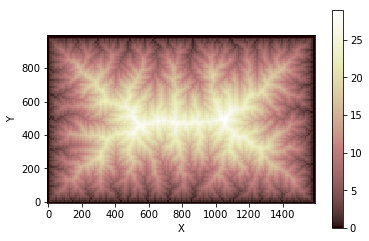

In [5]:
%matplotlib inline
imshow_grid(basic.grid, 'topographic__elevation')

0.158613883008


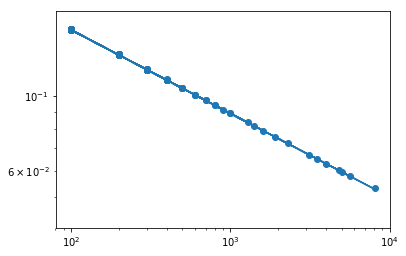

In [7]:
print(basic.grid.at_node['topographic__steepest_slope'][235])
#for some reason, the line of nodes adjacent to all the boundaries
plt.scatter(basic.grid.at_node['drainage_area'][(basic.grid.node_x > 1)&(basic.grid.node_x < 158)&(basic.grid.node_y >1)&(basic.grid.node_y<98)], basic.grid.at_node['topographic__steepest_slope'][(basic.grid.node_x > 1)&(basic.grid.node_x < 158)&(basic.grid.node_y >1)&(basic.grid.node_y<98)])
plt.plot(basic.grid.at_node['drainage_area'][(basic.grid.node_x > 1)&(basic.grid.node_x < 158)&(basic.grid.node_y >1)&(basic.grid.node_y<98)], (0.0005 / 0.001)*np.power(basic.grid.at_node['drainage_area'][(basic.grid.node_x > 1)&(basic.grid.node_x < 158)&(basic.grid.node_y >1)&(basic.grid.node_y<98)], -0.25))
plt.xscale('log')
plt.yscale('log')
#plt.ylim(0.0005, 0.01)

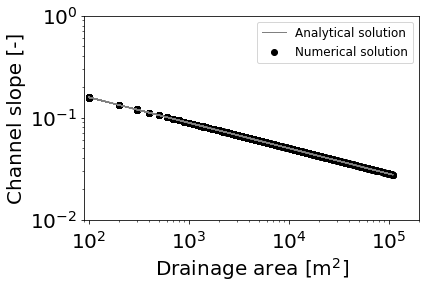

In [17]:
###MAKE SLOPE-AREA PLOT

import matplotlib

#assign area_array and slope_array
area_array = basic.grid.at_node['drainage_area'][(basic.grid.node_x > 10)&(basic.grid.node_x < 1580)&(basic.grid.node_y >10)&(basic.grid.node_y<980)]
slope_array = basic.grid.at_node['topographic__steepest_slope'][(basic.grid.node_x > 10)&(basic.grid.node_x < 1580)&(basic.grid.node_y >10)&(basic.grid.node_y<980)]

##instantiate figure and plot
fig = plt.figure(figsize=(6, 3.75))
slope_area = plt.subplot()

#plotting param
matplotlib.rcParams.update({'font.size': 20})

#create an array for the detachment-limited analytical solution
u = 0.0005 #m/yr, uplift or baselevel lowering rate
k = 0.001 #fluvial erodibility
m = 0.25 #discharge exponent
n = 1.0 #slope exponent

#calculate analytical slope from area field
analytical_slope_array = np.power((u / k), 1 / n) * np.power(area_array, -m/n)

#plot the analytical solution
slope_area.plot(area_array, analytical_slope_array, linestyle='-',
                color='grey', linewidth = 1, label = 'Analytical solution')

#plot the data
slope_area.scatter(area_array, slope_array, marker='o', c='k', 
                   label = 'Numerical solution') #plot HA data
                   
#make axes log and set limits
slope_area.set_xscale('log')
slope_area.set_yscale('log')

slope_area.set_xlim(9*10**1, 2*10**5)
slope_area.set_ylim(1e-2, 1e0)

#set x and y labels
slope_area.set_xlabel(r'Drainage area [m$^2$]')
slope_area.set_ylabel('Channel slope [-]')
slope_area.legend(scatterpoints=1,prop={'size':12})
slope_area.tick_params(axis='x', which='major', pad=7)

fig.savefig('variable_m_slope_area.eps',bbox_inches='tight', dpi=1000) #save figure

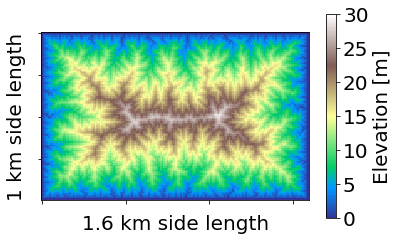

In [12]:
##MAKE TOPO FIGURE
#define 'topo'
topo = basic.grid.at_node['topographic__elevation']
#plotting param
matplotlib.rcParams.update({'font.size': 20})

# #instantiate figure and plot
topo_fig = plt.figure(figsize=(6, 3.75))
t1 = plt.subplot()
topo = topo.reshape(100,160)
ts1_plot = t1.imshow(topo[::-1], cmap='terrain', vmin = 0, vmax = 30)

#add colorbar
cb = plt.colorbar(ts1_plot, label = 'Elevation [m]')

#axis labels
t1.tick_params(labelbottom='off', labelleft='off') 
t1.set_ylabel('1 km side length', labelpad = 15)
t1.set_xlabel('1.6 km side length', labelpad = 15)

#save figure
topo_fig.savefig('variable_m_topo.eps',bbox_inches='tight', dpi=300)

In [15]:
from landlab.io.netcdf import write_netcdf
write_netcdf('variable_m.nc', basic.grid, format='NETCDF3_64BIT', names='topographic__elevation')